# Title: Predicting User Churn for Spotify
## Fall 2025 Data Science Project
### Maxine Hsu, Shreena Thakker, Amanda Tsai, Zoey Tsai
Contributions:

A: Project idea

B: Dataset Curation and Preprocessing

C: Data Exploration and Summary Statistics

D: ML Algorithm Design/Development

E: ML Algorithm Training and Test Data Analysis

F: Visualization, Result Analysis, Conclusion

G: Final Tutorial Report Creation

H: Additional (not listed above)

Maxine Hsu:

Shreena Thakker:

Amanda Tsai:

Zoey Tsai:

## Introduction
The topic we chose is user churn on Spotify. The question we want to answer is: Based on a set of features associated with a specific user, will the user churn?

A user is considered “churned” if the user no longer actively uses the platform. To answer this question, we will analyze user data such as listening habits, frequency of app usage, and other engagement metrics to predict whether a user will remain active on the platform.

The reason we chose this topic is because user retention is a challenge that many businesses struggle with. In general, it costs more to acquire new users than to keep existing ones. By answering this question, companies like Spotify can gain an understanding of the factors related to user churn and then develop business strategies to reduce it, which will increase profit in the long run. Understanding why users churn will also help companies identify weaknesses in their product and where resources should be directed to improve it.


## Data curation
### Loading data
Our data is from the Kaggle dataset “Spotify Analysis Dataset 2025” from https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis. This is a dataset of unique Spotify users, and has both categorical and numeric features associated with each user. The features in this dataset are:

* user_id: a unique identifier for each user

* gender: the user’s gender (Male/Female/Other)

* age: the user’s age

* country: the user’s location

* subscription_type: the type of subscription (Free/Premium/Family/Student)

* listening_time: the average listening time per day, measured in minutes

* songs_played_per_day: the average number of songs played per day

* skip_rate: the percentage of songs skipped

* device_type: the type of device used (Mobile/Desktop/Web)

* ads_listened_per_week: the average number of ads listened to per week

* offline_listening: offline mode usage

* is_churned: the user’s churn status, where 1 means the user is churned and 0 means the user is active

We used Python for data analysis. We first imported the necessary libraries, such as pandas, into our Colab notebook.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

import plotly.graph_objects as go
import plotly.express as px

Then we used the code provided by Kaggle documentation to load the dataset into a pandas frame in our notebook. We recommend using the code provided in the Kaggle documentation, especially for conducting analysis as a team on the same Colab notebook, because this helps avoid issues where team members are unable to consistently load the dataset. The Kaggle documentation can be found by clicking on the “Code” button in the top right corner of the Kaggle webpage for the dataset.

In [2]:
# Load dataset using code provided in Kaggle documentation
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "spotify_churn_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "nabihazahid/spotify-dataset-for-churn-analysis",
  file_path
)

/tmp/ipython-input-851591048.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'spotify-dataset-for-churn-analysis' dataset.


### Data preprocessing
After loading the dataset, we conducted data preprocessing. First, we looked at the properties of the dataset by checking the dimensions of the dataframe, what features it contained, and the types of the features.

In [3]:
# Check number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 8000
Number of columns: 12


In [4]:
# Get information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


We can see that the dataset has 12 features, 8000 entries, and contains both quantitative and categorical data.

The categorical attributes are: user_id, gender, country, subscription_type, device_type, offline_listening, and is_churned. The values for offline_listening and is_churned are boolean values represented by 0 for False and 1 for True.

The quantitative attributes are: age, listening_time, songs_played_per_day, skip_rate, and ads_listened_per_week.

Once we had a better understanding of our dataset, we proceeded to data cleaning. Data cleaning is important because we want to handle missing values, duplicates, formatting errors, and other errors that could affect the results of our data analysis before conducting data analysis.

To clean our data, we first checked for missing values.

In [5]:
# Check for missing values
np.sum(df.isna())

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


Next, we checked for duplicate user IDs.

In [6]:
# Check for duplicate user_ids. Should be unique.
df["user_id"].nunique()
# Check if there are 8000

8000

Since there are 8000 unique user IDs and 8000 rows, each ID is unique.

We then checked for duplicate users.

In [7]:
# Check for duplicates
print(df.drop_duplicates().shape[0])

# This drops the duplicates
df = df.drop_duplicates(subset = ["user_id"])

8000


There are no exact duplicates of users.

We then checked for the number of unique values. Categorical variables with too many categories must have spelling differences, and if not, the number of categories would probably have to be reduced.

In [8]:
# Check for number of unique values
df.nunique()

,0
user_id,8000
gender,3
age,44
country,8
subscription_type,4
listening_time,290
songs_played_per_day,99
skip_rate,61
device_type,3
ads_listened_per_week,46


From the results of the code above, we can see that all the categorical variables do not have more than 8 categories which is not a lot.

Next, we wanted to see the unqiue categories of each column and check if any spelling mistakes or human errors exist in the data.

In [9]:
categorical_columns = df.columns[df.dtypes == object]
for col in categorical_columns:
  print(col, ": ")
  print(df[col].unique())

gender : 
['Female' 'Other' 'Male']
country : 
['CA' 'DE' 'AU' 'US' 'UK' 'IN' 'FR' 'PK']
subscription_type : 
['Free' 'Family' 'Premium' 'Student']
device_type : 
['Desktop' 'Web' 'Mobile']


Fortunately, the categories are unique with no spelling differences or mistakes.

Next, we want to check for outliers, which can influence the results of data analysis.

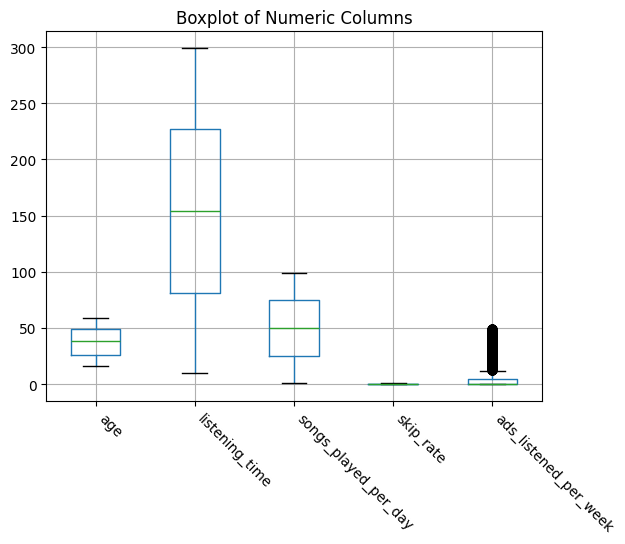

In [10]:
# Check for outliers in age, listening_time, songs_played_per_day, skip_rate,
# ads_listened_per_week
outlier_check_cols = ["age", "listening_time", "songs_played_per_day", "skip_rate",
"ads_listened_per_week"]

df[outlier_check_cols].boxplot()
plt.title("Boxplot of Numeric Columns")
plt.xticks(rotation=315, ha='left')
plt.show()

There are many outlier values for ads_listened_per_week column but since there are many, it is not likely that they are a mistake or a rare case. These values might provide some useful insight and should not be removed.

Lastly, we wanted to check that the binary features, offline_listening and is_churned, only contained the values 0 and 1.

In [11]:
# Check that the values for "offline_listening" and "is_churned" include only
# 0 and 1 (binary)
print(df["offline_listening"].unique())
print(df["is_churned"].unique())

[0 1]
[1 0]


## Exploratory data analysis

### Basic data exploration and summary statistics


In [12]:
# Summary statistics
df.describe()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


The summary statistics above show that the ads_listened_per_week column has a lot of zeros. That explains why so many of the points are considered outliers in the ads_listened_per_week column boxplot. One of the reasons for this could be that premium subscribers don't have any ads but free users must listen to ads. We can check this assumption.

In [13]:
# Check number of users for each subscription type
sub_counts = df['subscription_type'].value_counts()
display(sub_counts)

,count
subscription_type,
Premium,2115
Free,2018
Student,1959
Family,1908


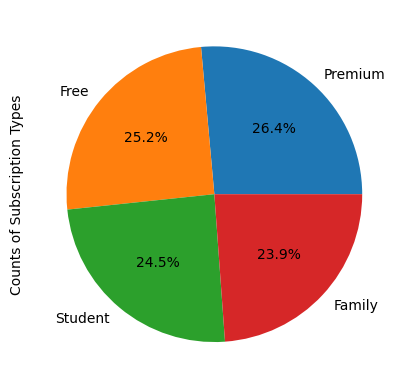

In [14]:
# Pie chart of user base by subscription type
sub_counts.plot(kind="pie", autopct="%0.1f%%", ylabel="Counts of Subscription Types")
plt.show()

Text(0.5, 1.0, 'Distribution of Avg Number of Ads over Subscription Types')

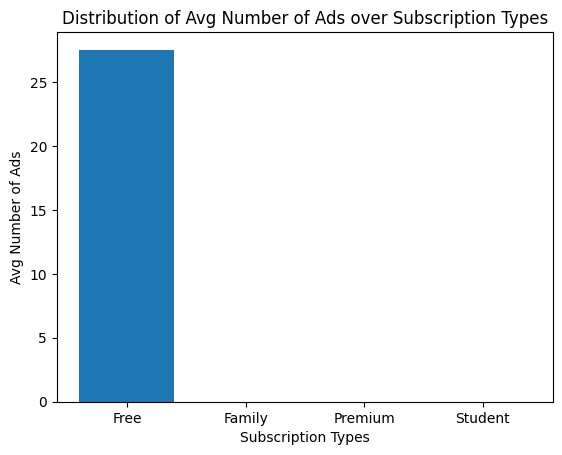

In [15]:
subscription_types = list(df['subscription_type'].unique())
premium = df[df['subscription_type'] == 'Premium']['ads_listened_per_week'].mean()
free = df[df['subscription_type'] == 'Free']['ads_listened_per_week'].mean()
family = df[df['subscription_type'] == 'Family']['ads_listened_per_week'].mean()
student = df[df['subscription_type'] == 'Student']['ads_listened_per_week'].mean()
averages = [free, family, premium, student]

plt.bar(subscription_types, averages)
plt.xlabel('Subscription Types')
plt.ylabel('Avg Number of Ads')
plt.title('Distribution of Avg Number of Ads over Subscription Types')

Based on Spotify's subscription model, only free users have to see ads. This explains a bunch of zeroes in the ads_listened_per_week column. This pattern could have an effect on customer churns and hence the data should be kept.

###Hypothesis Testing

For exploratory data analysis, we conducted several hypothesis tests.

####Test 1: Check for relationship between subscription type and user churn
> $H_0$: There is no association between type of subscription and whether the user churned or not.

> $H_a$: There is an association between type of subscription and whether the user churned or not.

In [16]:
# Statistical analysis method 1: Chi-squared test for independence of subscription_type and is_churned
contingency_table = pd.crosstab(df['subscription_type'], df['is_churned'])
statistic, pvalue, dof, expected_freq = sp.stats.chi2_contingency(contingency_table)

print('Expected frequencies:')
print(pd.DataFrame(expected_freq, index=['Family', 'Free', 'Premium', 'Student'], columns=['0', '1']))
print('\nObserved frequencies:')
print(contingency_table)
print(f'\nTest statistic: {statistic}')
print(f'p-value: {pvalue}')

Expected frequencies:
                   0           1
Family   1414.066500  493.933500
Free     1495.590250  522.409750
Premium  1567.479375  547.520625
Student  1451.863875  507.136125

Observed frequencies:
is_churned            0    1
subscription_type           
Family             1383  525
Free               1515  503
Premium            1585  530
Student            1446  513

Test statistic: 4.457518638155985
p-value: 0.216110972429786


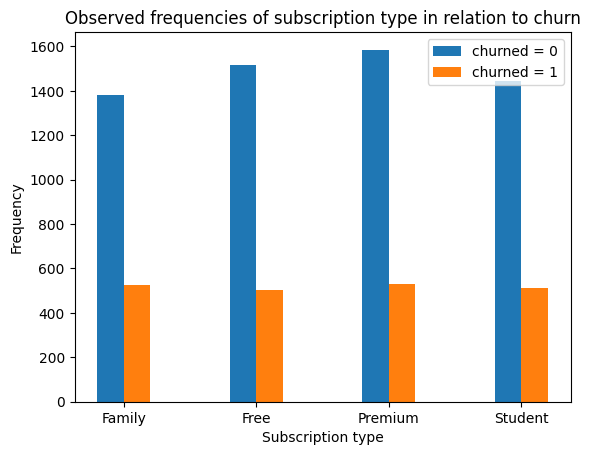

In [17]:
# Graph for method 1
width = 0.2
x = np.arange(df['subscription_type'].nunique())
y1 = contingency_table[0]
y2 = contingency_table[1]

plt.bar(x - 0.1, y1, width)
plt.bar(x + 0.1, y2, width)

plt.title('Observed frequencies of subscription type in relation to churn')
plt.xlabel('Subscription type')
plt.xticks(x, contingency_table.index)
plt.ylabel('Frequency')
plt.legend(['churned = 0', 'churned = 1'], loc='upper right')

plt.show()

**Conclusion**
> We fail to reject the null hypothesis, because the $p\text{-value}\approx0.22$ is greater than the significance level $\alpha=0.05$. This result is not significant. We conclude that whether the user churns or not is not dependent on their subscription type.

####Test 2: Check for relationship between subscription type and listening time

Originally, we wanted to use ANOVA test. But before we can apply the ANOVA test, we have to check that the assumptions are met. ANOVA assumes normality, homogeneity of variances, and independence.

To test for normality, we will create a histogram of listening time for each subscription type and check the shape of the histogram. To test for homogeneity of variances, we will create and compare boxplots of listening time for each subscription type.

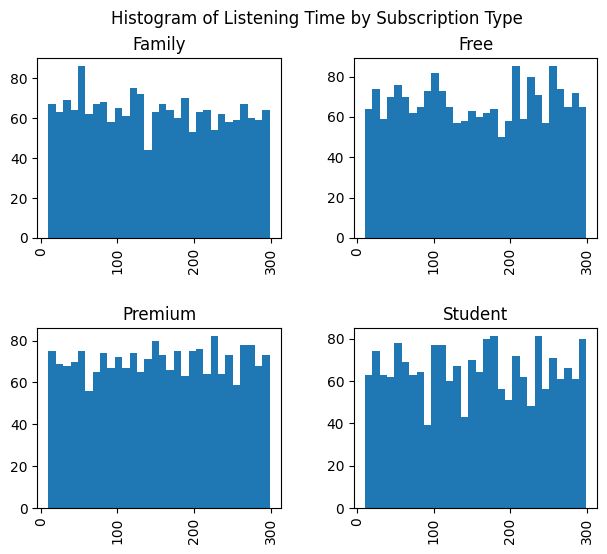

In [18]:
# Histograms to check that each group is normally distributed
df.hist(column="listening_time", by="subscription_type", bins=30, grid=False, figsize=(7,6))
plt.suptitle("Histogram of Listening Time by Subscription Type")
plt.show()

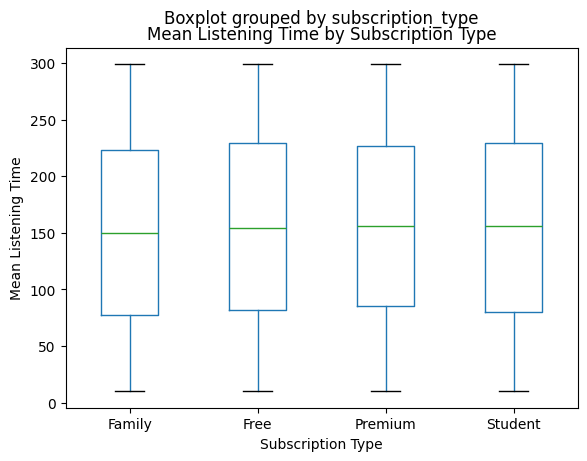

In [19]:
# Boxplots to check homogeneity of variances
df.boxplot(column="listening_time", by="subscription_type", grid=False)
plt.title("Mean Listening Time by Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("Mean Listening Time")
plt.show()

The histograms do not show a bell-shaped curve and all groups appear relatively uniform, which suggests that the data is not normally distributed. This means we cannot apply the ANOVA test. However, the boxplots show that the distributions are similar and have homogeneous variance.

Instead, we will use the Kruskal-Wallis test because it does not assume normality. The Kruskal-Wallis test compares the medians of 3 or more independent groups. We will use it to compare the median listening times of the subscription types.

So now our hypotheses are:
> $H_0$: There is no significant difference in median listening time among subscription types.

> $H_A$: There is a significant difference in median listening time among subscription types.

In [20]:
# Kruskal-Wallis test
# Group data by subscription type
group1 = df[df['subscription_type'] == 'Free']['listening_time']
group2 = df[df['subscription_type'] == 'Premium']['listening_time']
group3 = df[df['subscription_type'] == 'Family']['listening_time']
group4 = df[df['subscription_type'] == 'Student']['listening_time']

h_stat, p_val = sp.stats.kruskal(group1, group2, group3, group4)
print(f"H statistic: {h_stat}")
print(f"p-value: {p_val}")

H statistic: 3.386809010319737
p-value: 0.33574204314168216


**Conclusion**
> Since the p-value is approximately 0.336, which is greater than the level of significance 0.05, we fail to reject the null hypothesis. There is no statistically significant difference in median listening time among subscription types.

####Test 3: Check for relationship between subscription type and number of songs played per day
We will sort the data into two groups: free subscription type and not-free subscription type. These two groups are independent. We will use a hypothesis test to compare a quantitative variable, the songs played per day of the two groups.

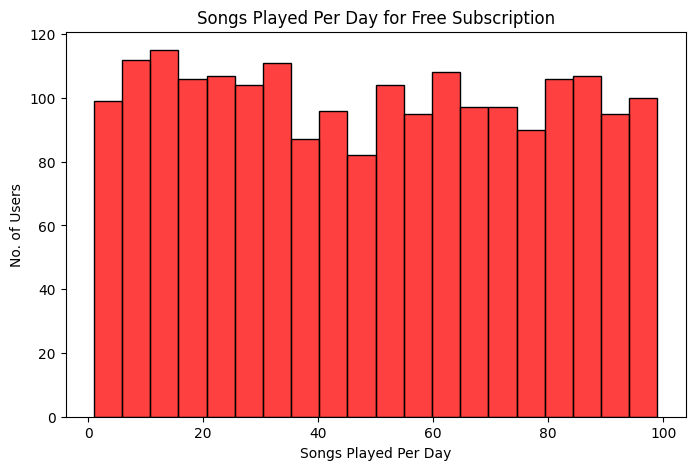

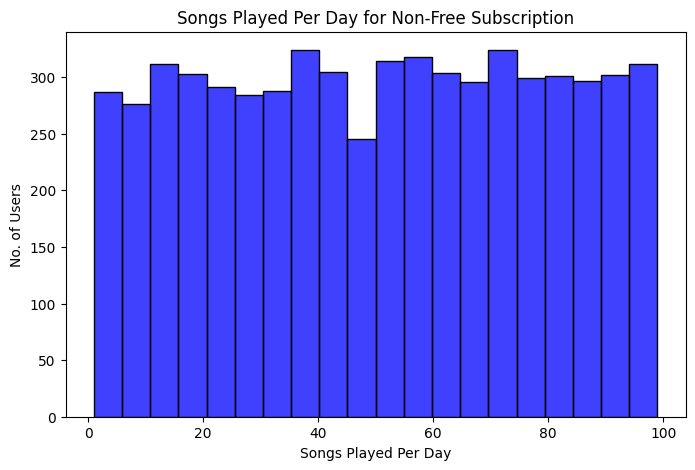

In [21]:
# Histograms to check that songs played per day is normally distributed for
# the two groups

# Free subscription
group_free = df[df['subscription_type'] == 'Free']['songs_played_per_day']
# None-free subscription
group_unfree = df[df['subscription_type'] != 'Free']['songs_played_per_day']

plt.figure(figsize=(8,5))
sns.histplot(group_free, bins=20, color='red')
plt.xlabel('Songs Played Per Day')
plt.ylabel('No. of Users')
plt.title('Songs Played Per Day for Free Subscription')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(group_unfree, bins=20, color='blue')
plt.xlabel('Songs Played Per Day')
plt.ylabel('No. of Users')
plt.title('Songs Played Per Day for Non-Free Subscription')
plt.show()

In [22]:
# No. of rows in free subscription group
group_free.shape[0]

2018

In [23]:
# No. of rows in non-free subscription group
group_unfree.shape[0]

5982

The number of songs played per day does not look normally distributed, so we will use a nonparametric test, the Mann-Whitney U test.

Our null and alternate hypotheses are:


> $H_0$: There is no significant difference in median of the number of songs played per day between the free and the non-free subscription groups.

> $H_A$: There is a significant difference in median of the number of songs played per day between the free and the non-free subscription groups.

In [24]:
# Statistical analysis method 3: Mann-Whitney U test for songs_played_per_day for free and non-free subscriptions
from scipy.stats import mannwhitneyu

test_stat, p_val = mannwhitneyu(group_free, group_unfree, alternative='two-sided')
print("Test statistic: ", test_stat)
print("P value: ", p_val)

Test statistic:  5884917.5
P value:  0.09250990492996371


**Conclusion**
> The p-value is approximately 0.092. As this is greater than the level of significance 0.05, we fail to reject the null hypothesis. There is no statistically significant difference in median of the number of songs played per day between the free and non-free subscription groups.

## Primary analysis*

Corresponds to parts D, E
* What machine learning technique do we use
* Why did we choose to use it?

### Feature Engineering

Before starting to build any Machine Learning model, it is important to perform basic feature engineering. Feature engineering is the process of transforming, creating, or deleting the different features/columns/variables to extract key information.
1) We can drop the'user_id' column which does not contribute any useful information to our analysis.
2) We will perform One-Hot-Encoding to transform the categorical variables to boolean value columns since most ML models can handle boolean and numeric data.
3) We will standardize the numerical columns (not one-hot-encoded) so that the relative scales for each of the features are similar.
3) For Kmeans Clustering and the Logistic Regression Models we will also use PCA to perform dimensionality reduction

### KMeans Clustering Method

To analyze the Churn patterns among different groups of Spotify customers we can use Unsupervised Machine Learning Clustering techniques. This can help analyze the different types of clients spotify has and the Churn likelihood for each group.

In [25]:
# Make a copy of the dataframe so that the original isn't modified
kmeans_df = df.copy(deep=True)

**One-Hot-Encoding**
<br>
This is a technique that converts a categorical column into separate columns for each category containg a boolean value (True/ False). 'True' indicates that the row/data entry has the category in question while 'False' indicates that the category is not present.

This method is not very feasible for categorical columns with too many categories. So first we will check the number of categories for each categorical variable.

In [26]:
# Get all categorical columns
categorical_columns = list(kmeans_df.select_dtypes(object).columns)
categorical_columns

['gender', 'country', 'subscription_type', 'device_type']

In [27]:
for col in categorical_columns:
  print(f"Unique values of '{col}' column: ")
  print(kmeans_df[col].unique())

Unique values of 'gender' column: 
['Female' 'Other' 'Male']
Unique values of 'country' column: 
['CA' 'DE' 'AU' 'US' 'UK' 'IN' 'FR' 'PK']
Unique values of 'subscription_type' column: 
['Free' 'Family' 'Premium' 'Student']
Unique values of 'device_type' column: 
['Desktop' 'Web' 'Mobile']


Each column does not have too many categories but some columns like the country column can blow up to be many. So, we will group them up into wider regions.

In [28]:
kmeans_df.replace(['CA', 'US'], 'North America', inplace=True)
kmeans_df.replace(['AU'], 'Oceania', inplace=True)
kmeans_df.replace(['DE', 'UK', 'FR'], 'Western Europe', inplace=True)
kmeans_df.replace(['PK', 'IN'], 'South Asia', inplace=True)

In [29]:
# Use one-hot encoding since there is no hierarchy between the features
df_encoded = pd.get_dummies(kmeans_df, columns=categorical_columns)
df_encoded.head()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned,gender_Female,gender_Male,...,country_Oceania,country_South Asia,country_Western Europe,subscription_type_Family,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Desktop,device_type_Mobile,device_type_Web
0,1,54,26,23,0.20,31,0,1,True,False,...,False,False,False,False,True,False,False,True,False,False
1,2,33,141,62,0.34,0,1,0,False,False,...,False,False,True,True,False,False,False,False,False,True
2,3,38,199,38,0.04,0,1,1,False,True,...,True,False,False,False,False,True,False,False,True,False
3,4,22,36,2,0.31,0,1,0,True,False,...,False,False,False,False,False,False,True,False,True,False
4,5,29,250,57,0.36,0,1,1,False,False,...,False,False,False,True,False,False,False,False,True,False


**Drop Unnecessary columns**
- 'user_id' column is not needed
- 'offline_listening' is only possible with some type of subscription other than free. So the subscription_type_free column already represents that information.
- We can also drop the 'is_churned' column since we want to oberseve the ratio of is_churned in different client groups and do not want KMeans to split based on churn.

In [30]:
# Free subscription type and listening offline (should not be possible)
print(df[(df_encoded['subscription_type_Free'] == True) & (df_encoded['offline_listening'] == 1)].shape)
# Not free subscription type and not listening offline (generally would not be true)
print(df[(df_encoded['subscription_type_Free'] == False) & (df_encoded['offline_listening'] == 0)].shape)

(0, 12)
(0, 12)


In [31]:
df_encoded.drop(columns=["offline_listening", "is_churned", "user_id"], inplace = True)

In [32]:
# See all the columns
print("Number of columns: ", len (list(df_encoded.columns)))
print(df_encoded.columns)

Number of columns:  19
Index(['age', 'listening_time', 'songs_played_per_day', 'skip_rate',
       'ads_listened_per_week', 'gender_Female', 'gender_Male', 'gender_Other',
       'country_North America', 'country_Oceania', 'country_South Asia',
       'country_Western Europe', 'subscription_type_Family',
       'subscription_type_Free', 'subscription_type_Premium',
       'subscription_type_Student', 'device_type_Desktop',
       'device_type_Mobile', 'device_type_Web'],
      dtype='object')


**Standardize Numerical Columns**
<br>
The Kmeans model requires you to standardize columns so each axes of the feature space are scaled similarly and one feature/variable does not get more important than the other.

In [33]:
df_encoded.dtypes

,0
age,int64
listening_time,int64
songs_played_per_day,int64
skip_rate,float64
ads_listened_per_week,int64
gender_Female,bool
gender_Male,bool
gender_Other,bool
country_North America,bool
country_Oceania,bool


In [34]:
# Get all the nuemric values
num_df = df_encoded.select_dtypes(include = 'number')
numeric_columns = list(num_df.columns)

In [35]:
# Use standardization so that features have comparable scales
# Standardization subtracts the mean and divides by the standard deviation,
#   giving a z-score for each value
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])
df_encoded.head()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,gender_Female,gender_Male,gender_Other,country_North America,country_Oceania,country_South Asia,country_Western Europe,subscription_type_Family,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Desktop,device_type_Mobile,device_type_Web
0,1.282452,-1.524434,-0.953574,-0.576827,1.766611,True,False,False,True,False,False,False,False,True,False,False,True,False,False
1,-0.365956,-0.155555,0.417349,0.229702,-0.509938,False,False,True,False,False,False,True,True,False,False,False,False,False,True
2,0.026522,0.534836,-0.426296,-1.498575,-0.509938,False,True,False,False,True,False,False,False,False,True,False,False,True,False
3,-1.229408,-1.405401,-1.691763,0.056875,-0.509938,True,False,False,True,False,False,False,False,False,False,True,False,True,False
4,-0.679939,1.141904,0.241590,0.344921,-0.509938,False,False,True,True,False,False,False,True,False,False,False,False,True,False


**Dimensionality Reduction**
<br>
KMeans method does not work well when there are too many features/variables/columns. So, we can use a dimensionality reduction method like PCA to reduce the number of variables and capture most of the important information.

In [36]:
# Function that applies PCA dimensionality reduction
def apply_pca(X_scaled, n_components):
    # n_components : number of new features you want
    pca = PCA(n_components = n_components, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    # Returns :
    # pca : PCA object
    # X_pca : modified dataframe with the new variables/pca components as columns
    return pca, X_pca

n_components = 5
pca, X_pca = apply_pca(df_encoded, n_components)
print(X_pca.shape)
print(pca.explained_variance_ratio_)

(8000, 5)
[0.15473586 0.13087735 0.12985346 0.12801923 0.12365715]


- So, the new dataframe now has 8000 entries with 5 variables (instead of 19)
- The sum of the ratio values above, give the amount of information that is captured by the new PCA components from the original data

**k Value Tuning**
<br>
The next step is to find a good number of clusters to split by. We can do this by finding a k value that isn't too high but also decreases the distortion value. Distortion is a measurement of how close the points are within the cluster.

1 : 5.2059620797747295
2 : 4.154888220668457
3 : 3.555577896425498
4 : 3.171036668576147
5 : 2.873884751196138
6 : 2.6348904275157747
7 : 2.4955572492533284
8 : 2.4118939861235487
9 : 2.2515989271187844


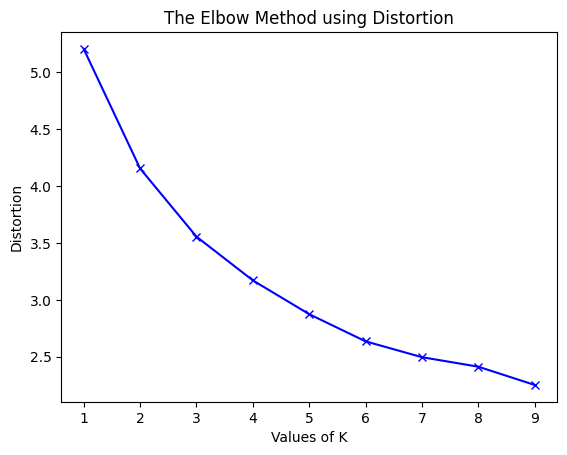

In [37]:
# Distortion sums up the squared difference of all the data points from their
# respective clusters.
# The mean distortion gives the average squared distance from the centroid for
# all the points in the dataset (rows here).
# Tells us how tightly clustered the points are to their respective centroids.

distortions = []
K = range(1, 10)
N = X_pca.shape[0]
mapping = {}
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_pca)

  # Cluster labels for each row
  # range from 0 to k-1
  labels = kmeans.labels_

  # Sum up all the sums of all the euclidean distances of each point from the
  # centroid of respective cluster.
  sum = 0

  # Each cluster
  for c in range(0, k):
    # Creates a list with true => if label == 0 and fasle otherwise
    mask = labels == c
    # Get all the rows where mask has True
    # i.e. gets all rows where the cluster is c
    filtered_X = X_pca[mask]
    centroid = kmeans.cluster_centers_[c]
    # Should be a single vector
    result = np.sum(((filtered_X - centroid) ** 2))
    sum += result

  # Divide the sum by the total number of data points to get the mean distortion.
  sum = sum / N

  distortions.append(sum)
  mapping[k] = sum


for key, val in mapping.items():
    print(f'{key} : {val}')


plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Based on the above results, k = 5 seems like a good enough value. After that, the rate of decrease of the distortion value slows down (leading to less improvement)

In [38]:
k_cluster = 5

**Apply Kmeans**

In [39]:
# Function that applies kmeans clustering
def apply_kmeans(X, n_clusters, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init="auto").fit(X)
    labels = kmeans.labels_
    # Returns:
    # kmeans = kmeans object
    # labels = an array of cluster values for each point.
    return kmeans, labels

# Apply K-means to both PCA results
kmeans, pca_labels = apply_kmeans(X_pca, n_clusters = k_cluster)
pca_labels

array([4, 1, 2, ..., 1, 0, 3], dtype=int32)

**Visualize The Clusters**

In [40]:
def visualize_3d_plotly_interactive(X_pca, pca_labels):
    """Fully interactive 3D visualization with Plotly using pre-computed labels"""

    k_cluster = len(np.unique(pca_labels))

    # Create the plot
    fig = go.Figure()

    # Add cluster points
    colors = px.colors.qualitative.Set1[:k_cluster]
    for i in range(k_cluster):
        cluster_mask = pca_labels == i
        fig.add_trace(go.Scatter3d(
            x=X_pca[cluster_mask, 0],
            y=X_pca[cluster_mask, 1],
            z=X_pca[cluster_mask, 2],
            mode='markers',
            marker=dict(
                size=5,
                color=colors[i],
                opacity=0.7
            ),
            name=f'Cluster {i}',
            text=[f'Cluster {i} Point {j}' for j in np.where(cluster_mask)[0]],
            hovertemplate='**%{text}**<br>' +
                         'PC1: %{x:.2f}<br>' +
                         'PC2: %{y:.2f}<br>' +
                         'PC3: %{z:.2f}<br>' +
                         '<extra></extra>'
        ))

    # Calculate centroids from the labeled data
    centroids = []
    for i in range(k_cluster):
        cluster_points = X_pca[pca_labels == i]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)

    centers_3d = np.array(centroids)[:, :3]

    # Add centroids
    fig.add_trace(go.Scatter3d(
        x=centers_3d[:, 0],
        y=centers_3d[:, 1],
        z=centers_3d[:, 2],
        mode='markers',
        marker=dict(
            size=8,
            color='red',
            symbol='x',
            line=dict(width=2, color='darkred')
        ),
        name='Centroids',
        text=[f'Centroid {i}' for i in range(k_cluster)],
        hovertemplate='**%{text}**<br>' +
                     'PC1: %{x:.2f}<br>' +
                     'PC2: %{y:.2f}<br>' +
                     'PC3: %{z:.2f}<br>' +
                     '<extra></extra>'
    ))

    # Update layout
    fig.update_layout(
        title='Interactive 3D Cluster Visualization',
        scene=dict(
            xaxis_title='Principal Component 1',
            yaxis_title='Principal Component 2',
            zaxis_title='Principal Component 3',
            camera=dict(
                eye=dict(x=1.2, y=1.2, z=1.2)
            )
        ),
        width=900,
        height=700,
        showlegend=True
    )

    fig.show()

    return pca_labels

# Usage with your existing pca_labels
cluster_labels = visualize_3d_plotly_interactive(X_pca, pca_labels)

Each color above represents a single cluster. The red 'X's inside the clusters indicate the centers of these clusters.

**Observations**
<br>
There is a clear gap between cluster 0 and the other clusters.This might be a split due to some single variable. There is also a region between the two main groups where there is a mix of many different colors. This can lead to some exception cases in the clear-cut clustering.

In [41]:
# Add the cluster labels as a column to the main dataframe
kmeans_df['cluster'] = pca_labels
kmeans_df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,cluster
0,1,Female,54,North America,Free,26,23,0.20,Desktop,31,0,1,4
1,2,Other,33,Western Europe,Family,141,62,0.34,Web,0,1,0,1
2,3,Male,38,Oceania,Premium,199,38,0.04,Mobile,0,1,1,2
3,4,Female,22,North America,Student,36,2,0.31,Mobile,0,1,0,1
4,5,Other,29,North America,Family,250,57,0.36,Mobile,0,1,1,0


In [42]:
# Group the dataframe by cluster
group_object = kmeans_df.groupby('cluster')

In [43]:
# Separate Dataframes for each cluster
cluster_0 = group_object.get_group(0).reset_index(drop = True)
cluster_1 = group_object.get_group(1).reset_index(drop = True)
cluster_2 = group_object.get_group(2).reset_index(drop = True)
cluster_3 = group_object.get_group(3).reset_index(drop = True)
cluster_4 = group_object.get_group(4).reset_index(drop = True)

# cluster 0
cluster_0.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,cluster
0,5,Other,29,North America,Family,250,57,0.36,Mobile,0,1,1,0
1,6,Female,17,Oceania,Free,219,35,0.46,Desktop,13,0,0,0
2,7,Female,39,Western Europe,Premium,289,44,0.38,Desktop,0,1,0,0
3,16,Male,25,Western Europe,Student,230,25,0.26,Desktop,0,1,0,0
4,17,Female,36,Western Europe,Student,181,93,0.23,Mobile,0,1,0,0


In [44]:
c0_churned = len(cluster_0[cluster_0['is_churned'] == 1]) / cluster_0.shape[0]
c1_churned = len(cluster_1[cluster_1['is_churned'] == 1]) / cluster_1.shape[0]
c2_churned = len(cluster_2[cluster_2['is_churned'] == 1]) / cluster_2.shape[0]
c3_churned = len(cluster_3[cluster_3['is_churned'] == 1]) / cluster_3.shape[0]
c4_churned = len(cluster_4[cluster_4['is_churned'] == 1]) / cluster_4.shape[0]

c0_not_churned = len(cluster_0[cluster_0['is_churned'] == 0]) / cluster_0.shape[0]
c1_not_churned = len(cluster_1[cluster_1['is_churned'] == 0]) / cluster_1.shape[0]
c2_not_churned = len(cluster_2[cluster_2['is_churned'] == 0]) / cluster_2.shape[0]
c3_not_churned = len(cluster_3[cluster_3['is_churned'] == 0]) / cluster_3.shape[0]
c4_not_churned = len(cluster_4[cluster_4['is_churned'] == 0]) / cluster_4.shape[0]


cluster_dict = {'cluster' : kmeans_df['cluster'].unique(),
                'churned' : [c0_churned, c1_churned, c2_churned, c3_churned, c4_churned],
                'not_churned' : [c0_not_churned, c1_not_churned, c2_not_churned, c3_not_churned, c4_not_churned]}
df_filtered = pd.DataFrame(cluster_dict)
df_filtered

,cluster,churned,not_churned
0,4,0.267115,0.732885
1,1,0.261676,0.738324
2,2,0.249572,0.750428
3,0,0.258788,0.741212
4,3,0.257857,0.742143


The results above show that the proportion of customers who churned is the same for all the clusters.
Although, this information cannot be very useful in finding patterns in customer churn, it does show that focusing the marketing on a single group of clients might not be the best strategy for increasing customer churn.

In [45]:
for cluster in [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4]:
  categorical_cols = cluster.select_dtypes(include=['object']).columns
  numerical_cols = cluster.select_dtypes(include=['number']).columns

  print(cluster['cluster'].unique())

  max_categorical_values = {}
  for col in categorical_cols:
      max_categorical_values[col] = cluster[col].mode()[0] # [0] to get the first mode if multiple exist
  print("Maximum (Mode) for Categorical Columns:")
  print(max_categorical_values)


  avg_numerical_values = cluster[numerical_cols].mean()
  print("\nAverage for Numerical Columns:")
  print(avg_numerical_values)

  print()

[0]
Maximum (Mode) for Categorical Columns:
{'gender': 'Male', 'country': 'Western Europe', 'subscription_type': 'Premium', 'device_type': 'Desktop'}

Average for Numerical Columns:
user_id                  3935.907090
age                        27.441932
listening_time            232.263447
songs_played_per_day       51.387531
skip_rate                   0.237249
ads_listened_per_week       1.259780
offline_listening           0.899756
is_churned                  0.267115
cluster                     0.000000
dtype: float64

[1]
Maximum (Mode) for Categorical Columns:
{'gender': 'Other', 'country': 'Western Europe', 'subscription_type': 'Premium', 'device_type': 'Mobile'}

Average for Numerical Columns:
user_id                  3960.440819
age                        27.246961
listening_time             87.406270
songs_played_per_day       50.811900
skip_rate                   0.405502
ads_listened_per_week       1.330774
offline_listening           0.893154
is_churned                  

The above the tables show the different dominant groups among the Spotify clients. As seen above, the customer churn for all these groups is not very high (around 25 %). Seeing the dominant characteristics of the client pool can help better market Spotify and bring updates tailored to these communities.

We see that the groups (clusters 2 and 3), with on average older people, seem to be listening on their desktop. Having features that are intuitive for desktops could appeal to them.

###Random Forest Classification
We also chose a Random Forest classification model since we wanted to predict whether or not a user would churn based on the features available in the dataset. The Random Forest classification model is suitable for this classification task and suitable for our dataset, which does not have super high-dimensionality, does not have a normal distribution, and contains both categorical and numberical features. Additionally, using Random Forest will mitigate the overfitting issues that occur in singular decision tree models.

Source: https://www.geeksforgeeks.org/machine-learning/what-are-the-advantages-and-disadvantages-of-random-forest/

**Preparing the dataset**

Before training the model, we prepared the dataset with some operations.

We dropped the column user_id, the column that contains unique identifiers for each user, as it is not relevant to predicting churn.

We then used one-hot encoding to trasnform the categorical features and eliminate ordinality, as there is no hierarchy between the features. We also applied standardization to the data so that the features would have comparable scales, which prevents features with large ranges from dominating the results.

Source: https://www.geeksforgeeks.org/machine-learning/ml-one-hot-encoding/
Source: https://builtin.com/data-science/when-and-why-standardize-your-data

Remove Unecessary Columns:

In [46]:
# Drop user_id since it does not determine churn
df.drop(["user_id"], axis=1, inplace=True)

One-Hot-Encoding on Categorical Columns

In [47]:
# Get all categorical columns
categorical_columns = list(df.select_dtypes(object).columns)
categorical_columns

['gender', 'country', 'subscription_type', 'device_type']

In [48]:
# Use one-hot encoding since there is no hierarchy between the features
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded.head()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned,gender_Female,gender_Male,gender_Other,...,country_PK,country_UK,country_US,subscription_type_Family,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Desktop,device_type_Mobile,device_type_Web
0,54,26,23,0.20,31,0,1,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,33,141,62,0.34,0,1,0,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,38,199,38,0.04,0,1,1,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,22,36,2,0.31,0,1,0,True,False,False,...,False,False,False,False,False,False,True,False,True,False
4,29,250,57,0.36,0,1,1,False,False,True,...,False,False,True,True,False,False,False,False,True,False


In [49]:
# See all the columns
print("Number of columns: ", len (list(df_encoded.columns)))
print(df_encoded.columns)

Number of columns:  25
Index(['age', 'listening_time', 'songs_played_per_day', 'skip_rate',
       'ads_listened_per_week', 'offline_listening', 'is_churned',
       'gender_Female', 'gender_Male', 'gender_Other', 'country_AU',
       'country_CA', 'country_DE', 'country_FR', 'country_IN', 'country_PK',
       'country_UK', 'country_US', 'subscription_type_Family',
       'subscription_type_Free', 'subscription_type_Premium',
       'subscription_type_Student', 'device_type_Desktop',
       'device_type_Mobile', 'device_type_Web'],
      dtype='object')


Standardize Continuous Numerical Columns

In [50]:
# Get the data types of the columns after encoding
df_encoded.dtypes

,0
age,int64
listening_time,int64
songs_played_per_day,int64
skip_rate,float64
ads_listened_per_week,int64
offline_listening,int64
is_churned,int64
gender_Female,bool
gender_Male,bool
gender_Other,bool


In [51]:
# Get the numeric columns
num_df = df_encoded.select_dtypes(include = 'number')
numeric_columns = list(num_df.columns)
print(numeric_columns)

['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening', 'is_churned']


In [52]:
# Remove is_churned from num_df since it is a categorical column and also our target variable
numeric_columns.remove("is_churned")
print(numeric_columns)

['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening']


In [53]:
# Use standardization so that continuous numeric features have comparable scales
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])
df_encoded.head()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned,gender_Female,gender_Male,gender_Other,...,country_PK,country_UK,country_US,subscription_type_Family,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Desktop,device_type_Mobile,device_type_Web
0,1.282452,-1.524434,-0.953574,-0.576827,1.766611,-1.721720,1,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,-0.365956,-0.155555,0.417349,0.229702,-0.509938,0.580814,0,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.026522,0.534836,-0.426296,-1.498575,-0.509938,0.580814,1,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,-1.229408,-1.405401,-1.691763,0.056875,-0.509938,0.580814,0,True,False,False,...,False,False,False,False,False,False,True,False,True,False
4,-0.679939,1.141904,0.241590,0.344921,-0.509938,0.580814,1,False,False,True,...,False,False,True,True,False,False,False,False,True,False


**Training**

Since we will use the model to predict churn, we set our target variable Y to the is_churned column, and set X to all other columns. We also split our dataset into training and testing sets.  We then trained the Random Forest model with 10 as the number of estimators; this number was determined via experimentation.

We tested the Random Forest model, but the evaluation metrics showed that the model predicted only a very small proportion of the actual churn cases. Since the Random Forest model had a low-performing F1 score of 0.096, we decided to try a different machine learning model.

Define features (X) and labels(Y)

In [54]:
# Set Y to the target variable is_churned
Y = df_encoded["is_churned"]
# Set X to features besides the target variable is_churned
X = df_encoded.drop(["is_churned"], axis=1)

Split Data into Training and Testing

In [55]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, random_state=42)

Random Forest Model

In [56]:
def train_eval_rand_forest (n_estimators):
    rf = RandomForestClassifier(n_estimators=n_estimators, class_weight="balanced", random_state=42)
    rf.fit(X_train, Y_train)

    # Make predictions
    Y_pred = rf.predict(X_test)

    # Evaluate the model using classifier metrics
    # Accuracy
    print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
    # F1 score
    print("F1 Score: ", f1_score(Y_test, Y_pred))
    # Precision score
    print("Precision Score: ", precision_score(Y_test, Y_pred))
    # Recall score
    print("Recall Score: ", recall_score(Y_test, Y_pred))

    # Calculate proportion of predicted churn to actual churn
    print("Predicted/actual churn: ", np.sum(Y_pred)/np.sum(Y_test))

In [57]:
# Set the number of estimators
n_estimators_list = [10, 20, 50, 100, 150, 200]

for n_estimators in n_estimators_list:
    print("n_estimators : ", n_estimators)
    # Train the model
    train_eval_rand_forest(n_estimators)
    print()

n_estimators :  10
Accuracy Score:  0.729375
F1 Score:  0.09603340292275574
Precision Score:  0.2911392405063291
Recall Score:  0.0575
Predicted/actual churn:  0.1975

n_estimators :  20
Accuracy Score:  0.738125
F1 Score:  0.07912087912087912
Precision Score:  0.32727272727272727
Recall Score:  0.045
Predicted/actual churn:  0.1375

n_estimators :  50
Accuracy Score:  0.74375
F1 Score:  0.046511627906976744
Precision Score:  0.3333333333333333
Recall Score:  0.025
Predicted/actual churn:  0.075

n_estimators :  100
Accuracy Score:  0.743125
F1 Score:  0.028368794326241134
Precision Score:  0.2608695652173913
Recall Score:  0.015
Predicted/actual churn:  0.0575

n_estimators :  150
Accuracy Score:  0.746875
F1 Score:  0.03800475059382423
Precision Score:  0.38095238095238093
Recall Score:  0.02
Predicted/actual churn:  0.0525

n_estimators :  200
Accuracy Score:  0.74625
F1 Score:  0.04245283018867924
Precision Score:  0.375
Recall Score:  0.0225
Predicted/actual churn:  0.06



Final Random Forest Model

In [58]:
n_estimators = 10
# Train the model
train_eval_rand_forest (n_estimators)

Accuracy Score:  0.729375
F1 Score:  0.09603340292275574
Precision Score:  0.2911392405063291
Recall Score:  0.0575
Predicted/actual churn:  0.1975


**Note**
<br>
The accuracy is similar to the proportion of clients that haven't churned in the entire dataset (0.74). The precision, recall, and f1 score is also really bad. So, the model is generally just guessing 0 most of the time.

###Logistic Regression
We also chose the Logistic Regression model since it is a linear classifier for binary problems, which our churn prediction problem (predict if a user will churn or not churn) falls into.
To fine-tune the model, we generated predictions using the predict_proba() method, which allows us to control the model's threshold. Experimentation determined that 0.5 was the optimal threshold level, so we switched to the predict() method, which uses 0.5 as its threshold.

F1 Score:  0.36

Precision Score:  0.27

Recall Score:  0.54

Predicted/actual churn:  2.0

We have displayed here the F1, precision, and recall scores, as well as the proportion of predicted to actual churn. The F1 score measures the harmonic mean of precision and recall; the closer this score is to 1, the better the model's performance. Precision measures the proportion of true positives to the total predicted positives, which indicates the model's ability to avoid false positives; the closer this score is to 1, the better. Recall measures the proportion of true positives to the total actual positives, which indicates the model's ability to identify all positive instances; the closer this score is to 1, the better.


Testing different thresholds

In [60]:
# Use X, Y, and training and testing sets from the code above

# Train the Logistic Regression Model
logr = LogisticRegression(class_weight="balanced", random_state=42)
logr.fit(X_train, Y_train)

# Make probability predictions
Y_prob = logr.predict_proba(X_test)
# Get second column which represents the probability of 1 for each row
Y_prob = Y_prob[:, 1]

thresholds = [0.5, 0.6, 0.7, 0.8]
for threshold in thresholds:
  print("Threshold value used : ", threshold)
  Y_pred = (Y_prob >= threshold).astype(int)

  # Evaluate the model using classifier metrics
  # Accuracy
  print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
  # F1 score
  print("F1 Score: ", f1_score(Y_test, Y_pred))
  # Precision score
  print("Precision Score: ", precision_score(Y_test, Y_pred))
  # Recall score
  print("Recall Score: ", recall_score(Y_test, Y_pred))

  # Calculate proportion of predicted churn to actual churn
  print("Predicted/actual churn: ", np.sum(Y_pred)/np.sum(Y_test))

  print()

Threshold value used :  0.5
Accuracy Score:  0.52
F1 Score:  0.36
Precision Score:  0.27
Recall Score:  0.54
Predicted/actual churn:  2.0

Threshold value used :  0.6
Accuracy Score:  0.75
F1 Score:  0.0
Precision Score:  0.0
Recall Score:  0.0
Predicted/actual churn:  0.0

Threshold value used :  0.7
Accuracy Score:  0.75
F1 Score:  0.0
Precision Score:  0.0
Recall Score:  0.0
Predicted/actual churn:  0.0

Threshold value used :  0.8
Accuracy Score:  0.75
F1 Score:  0.0
Precision Score:  0.0
Recall Score:  0.0
Predicted/actual churn:  0.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Notice that having a higher threshold, it isn't predicting any positives correctly.

In [61]:
# Use X, Y, and training and testing sets from the code above

# Train the Logistic Regression Model
logr = LogisticRegression(class_weight="balanced", random_state=42)
logr.fit(X_train, Y_train)

# Make predictions
Y_pred = logr.predict(X_test)
# Evaluate the model using classifier metrics
# Accuracy
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
# F1 score
print("F1 Score: ", f1_score(Y_test, Y_pred))
# Precision score
print("Precision Score: ", precision_score(Y_test, Y_pred))
# Recall score
print("Recall Score: ", recall_score(Y_test, Y_pred))

# Calculate proportion of predicted churn to actual churn
print("Predicted/actual churn: ", np.sum(Y_pred)/np.sum(Y_test))

Accuracy Score:  0.52
F1 Score:  0.36
Precision Score:  0.27
Recall Score:  0.54
Predicted/actual churn:  2.0


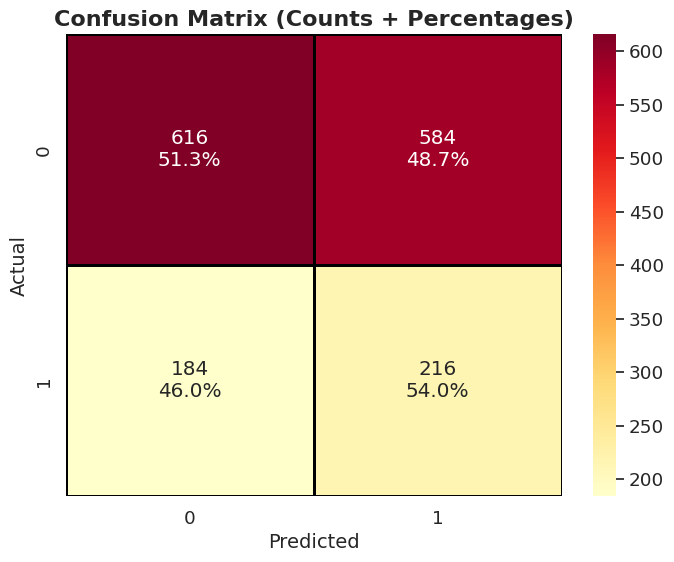

In [62]:
cm = confusion_matrix(Y_test, Y_pred)
cm_sum = cm.sum(axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)

labels = np.asarray([f"{v}\n{p:.1f}%" for v, p in zip(cm.flatten(), cm_perc.flatten())]).reshape(cm.shape)

sns.heatmap(cm, annot=labels, fmt="", cmap="YlOrRd", linewidths=2, linecolor='black')

plt.title("Confusion Matrix (Counts + Percentages)", fontsize=16, fontweight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)

plt.show()

The above colnfusion matrix shows that the number of correct predictions was about half or the total number of entires which explains the accuracy of 0.52. The percent of false positives and false negatives are both pretty high explaining the low f1 score.

**Logistic Regression Using PCA**
<br>
Next we tried to use the PCA dimensionality reduction to reduce the number of features to 2. This reduces data sparsity which could improve results. It is also easier to visualize the decision boundary created by the Logistic Regression model with two features.

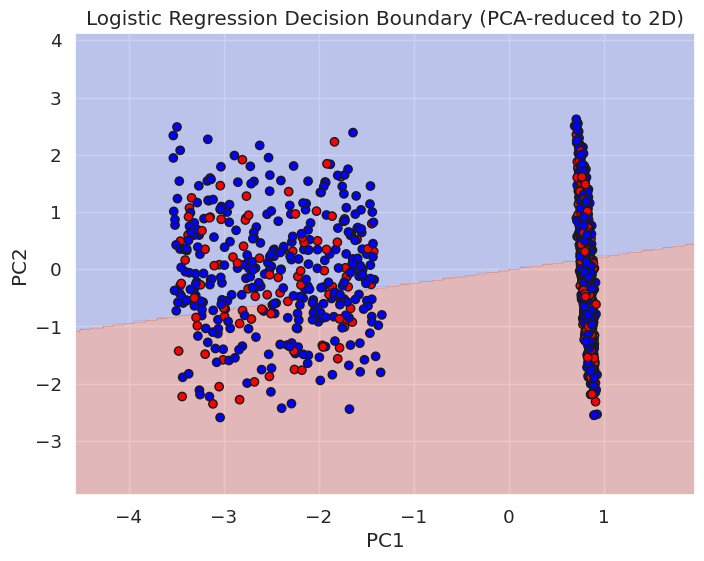

In [63]:
# Reduce to 2D
pca = PCA(n_components=2)
# Fit on training data and transform both X_train and X_test
# Both will now contain only two variables/PCA components
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Fit LR on 2D PCA space
logr_pca = LogisticRegression(class_weight="balanced", random_state=42)
logr_pca.fit(X_train_2D, Y_train)

# Grid for visualization
x_min, x_max = X_train_2D[:,0].min() - 1, X_train_2D[:,0].max() + 1
y_min, y_max = X_train_2D[:,1].min() - 1, X_train_2D[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = logr_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

plt.scatter(X_test_2D[:,0], X_test_2D[:,1], c=Y_test, cmap="bwr", edgecolors="k")

plt.title("Logistic Regression Decision Boundary (PCA-reduced to 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

As we see here, there doesn't seem to be a linear boundary between the two classes. The points are all interspersed. This means that a linear model is likely not approporiate for this data.

### Gradient Boosting
Since the previous two models didn't work well, especially because of the high class imbalance in our data, we chose to use the XGBoost Model which is a better choice for data with class imbalance. It includes a sequence of Decision Tree models, each one correcting the error of the previous model. This makes predictions better and allows it to capture complex relationships and patterns in the data The XGBoost model specifically also allows you to give more weight to the positive class (label = 1) during training which can help the model better learn the patterns of the positive class, representing customers who churned.

Since the ratio between the negative : positive classes is around 3 : 1, we set the 'scale_pos_weight' to 3. We also iterated through different max_depth values for the decision trees. The model with a max_depth value of 3 lead to the following best result:

Max Depth value :  3
Accuracy Score:  0.405
F1 Score:  0.36786188579017265
Precision Score:  0.2504520795660036
Recall Score:  0.6925
Predicted/actual churn:  2.765

This does not really improve accuracy or the F1 score. However, it does increase the recall value to around 70%. Which means that 70% of the churned customers are identified correctly. However, the low precision score means that the model also classifies a lot of the clients who didn't churn as likely to churn.
However, a higher recall value is preferable in our case since we would rather get as many customers that may churn (high recall) even though that brings clients that many not churn (false positive)

In [64]:
# Use X, Y, and training and testing sets from the code above

max_depth_list = [3, 4, 5, 6, 7, 8, 9 , 10]

for md in max_depth_list:
    print("Max Depth value : ", md)

    # declare parameters
    params = {
                'max_depth': md,
                'learning_rate': 0.01,
                'n_estimators':200,
                'random_state' : 42,
                'scale_pos_weight' : 3
            }
    # instantiate the classifier
    xgb_clf = XGBClassifier(**params)

    # fit the classifier to the training data
    xgb_clf.fit(X_train, Y_train)
    # Make predictions
    Y_pred = xgb_clf.predict(X_test)
    # Evaluate the model using classifier metrics
    # Accuracy
    print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
    # F1 score
    print("F1 Score: ", f1_score(Y_test, Y_pred))
    # Precision score
    print("Precision Score: ", precision_score(Y_test, Y_pred))
    # Recall score
    print("Recall Score: ", recall_score(Y_test, Y_pred))

    # Calculate proportion of predicted churn to actual churn
    print("Predicted/actual churn: ", np.sum(Y_pred)/np.sum(Y_test))

    print()

Max Depth value :  3
Accuracy Score:  0.405
F1 Score:  0.36786188579017265
Precision Score:  0.2504520795660036
Recall Score:  0.6925
Predicted/actual churn:  2.765

Max Depth value :  4
Accuracy Score:  0.4375
F1 Score:  0.35805991440798857
Precision Score:  0.250499001996008
Recall Score:  0.6275
Predicted/actual churn:  2.505

Max Depth value :  5
Accuracy Score:  0.47375
F1 Score:  0.3630862329803328
Precision Score:  0.2603036876355748
Recall Score:  0.6
Predicted/actual churn:  2.305

Max Depth value :  6
Accuracy Score:  0.499375
F1 Score:  0.35036496350364965
Precision Score:  0.25930372148859543
Recall Score:  0.54
Predicted/actual churn:  2.0825

Max Depth value :  7
Accuracy Score:  0.5325
F1 Score:  0.3606837606837607
Precision Score:  0.274025974025974
Recall Score:  0.5275
Predicted/actual churn:  1.925

Max Depth value :  8
Accuracy Score:  0.543125
F1 Score:  0.3324200913242009
Precision Score:  0.26187050359712233
Recall Score:  0.455
Predicted/actual churn:  1.7375

M

Final Model

In [65]:
# declare parameters
params = {
            'max_depth': 3,
            'learning_rate': 0.01,
            'n_estimators':200,
            'random_state' : 42,
            'scale_pos_weight' : 3
        }
# instantiate the classifier
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, Y_train)
# Make predictions
Y_pred = xgb_clf.predict(X_test)
# Evaluate the model using classifier metrics
# Accuracy
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
# F1 score
print("F1 Score: ", f1_score(Y_test, Y_pred))
# Precision score
print("Precision Score: ", precision_score(Y_test, Y_pred))
# Recall score
print("Recall Score: ", recall_score(Y_test, Y_pred))

# Calculate proportion of predicted churn to actual churn
print("Predicted/actual churn: ", np.sum(Y_pred)/np.sum(Y_test))

Accuracy Score:  0.405
F1 Score:  0.36786188579017265
Precision Score:  0.2504520795660036
Recall Score:  0.6925
Predicted/actual churn:  2.765


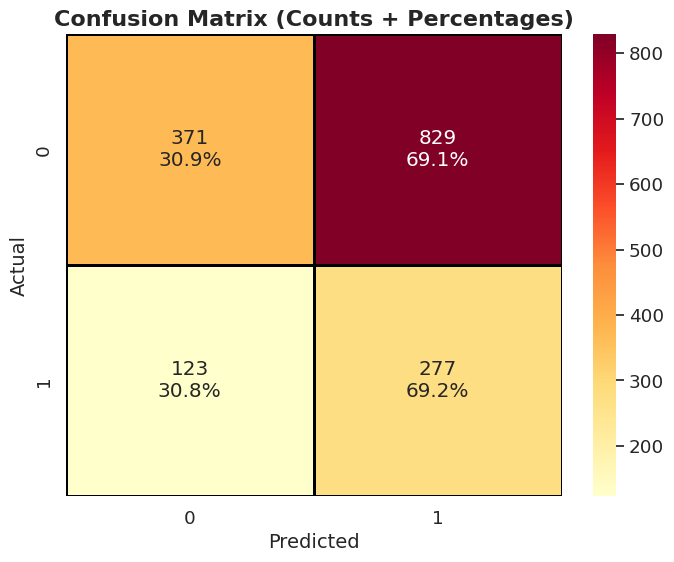

In [66]:
cm = confusion_matrix(Y_test, Y_pred)
cm_sum = cm.sum(axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100

plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)

labels = np.asarray([f"{v}\n{p:.1f}%" for v, p in zip(cm.flatten(), cm_perc.flatten())]).reshape(cm.shape)

sns.heatmap(cm, annot=labels, fmt="", cmap="YlOrRd", linewidths=2, linecolor='black')

plt.title("Confusion Matrix (Counts + Percentages)", fontsize=16, fontweight='bold')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)

plt.show()

Looking at the confusion matrix above, it can be seen that majority of the predictions are positive (label = 1 / customer will churn). This explains why the model is able to capture most clients a larger number of clients that churned. We also see that there is a high rate of false positives (customers who are marked as churned but were actually not churned. This is why the precision is very low.

In [67]:
importances = xgb_clf.feature_importances_
feature_names = X_train.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

fi_df.head(5)

,feature,importance
23,device_type_Web,0.087246
16,country_US,0.084832
2,songs_played_per_day,0.077721
7,gender_Male,0.075024
3,skip_rate,0.069387


/tmp/ipython-input-573599593.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0, 0.5, 'Normalized importance')

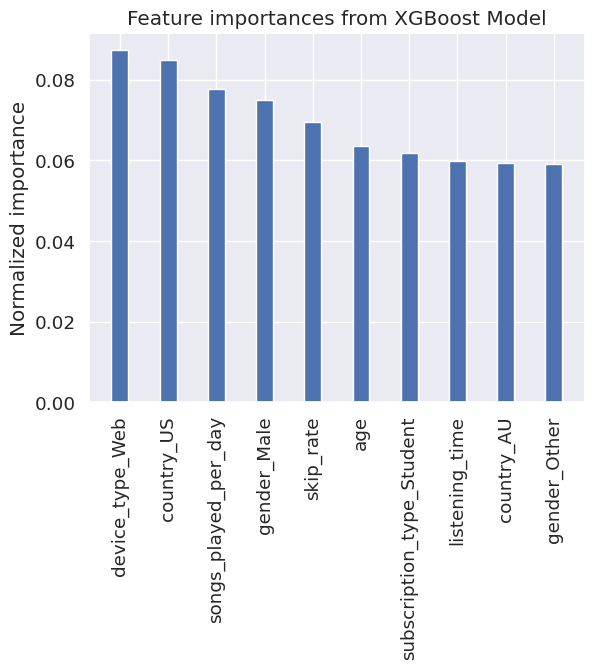

In [68]:
fig, ax = plt.subplots()

ax.bar(fi_df['feature'][:10], fi_df['importance'][:10], width = 0.35)
#ax.set_xticks(np.arange(10))
ax.set_xticklabels(fi_df['feature'][:10], rotation = 90)
plt.title('Feature importances from XGBoost Model')
ax.set_ylabel('Normalized importance')

The above graph shows how much each feature contributes to the prediction. None of the features are correlated (positively, negatively) with the Churn value. It seems like the Churn proportions are almost independent of the different features.

### Next Steps

- Get more diverse data
- Create features that better correlate to the label value.

## Visualization
* At least 1 plot that explains the results and insights of primary analysis
* Label and explain every element, plus include legend

## Insights and conclusions
* What do we learn about the topic?
* What are the results of our primary analysis?